# EE 380L: Data Mining
## Assignment 4

Due: Mar 28 at 11:59 pm  
Total points: 50

You may work in pairs. Only one student per pair needs to submit the assignment on Canvas, but you should include names and UTEIDs for both students.

# Question 1: Decision Tree using Python (7 pts)
In this problem, you will model the data using decision trees to perform a classification task. Load the BreastTissue.csv dataset in Q1 folder. The dataset has been preprocessed. The description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue). Using the class tree.DecisionTreeClassifier (http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree), build two different trees with a maximum depth of two using the split criteria (i) Gini and (ii) Entropy. Use entire data to build trees. Plot the two trees. If your classifier object is called clf, use the following commands to save the generated tree as a '.dot' file that can be used to visualize the tree using Webgraphviz: http://www.webgraphviz.com/

Hint: see  http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

Copy paste the contents of your '.dot' file into the text window on the website to visualize the trees. At which node(s) do they differ?

In [6]:
from sklearn import tree
from sklearn.externals.six import StringIO
import numpy as np
import pandas as pd

filename = 'Q1/BreastTissue.csv'
names = ['Case #','Class','I0','PA500','HFS','DA','Area','A/DA','Max IP','DR','P']
data = pd.read_csv(filename, names=names)
X = data.ix[1:,'I0':]
Y = data.ix[1:, 'Class']

gini_clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=2)
gini_clf = gini_clf.fit(X.as_matrix(), Y.as_matrix())    

with open("decision_tree_gini.dot", 'w') as f:
    f = tree.export_graphviz(gini_clf, out_file=f)

en_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
en_clf = en_clf.fit(X.as_matrix(), Y.as_matrix())    

with open("decision_tree_entropy.dot", 'w') as f:
    f = tree.export_graphviz(en_clf, out_file=f)

![title](gini.png)
-----------------------
![title](entropy.png)

# Question 2: Bayesian Networks (10 pts)
In the Bayesian Network shown below, the nodes represent the following random variables: S stands for "Smoking", LC for "Lung Cancer", B for "Bronchitis", T for "Tuberculosis", D for "Dyspnea". The necessary conditional probabilities are provided alongside. 

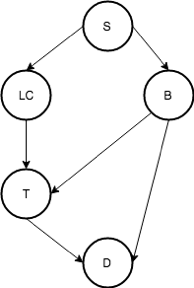

In [8]:
from IPython.display import Image
Image(filename='BayesianNetworks.png')

$$Pr(S = yes) = 0.1$$
$$Pr(LC = yes | S = yes) = 0.03$$
$$Pr(LC = yes | S = no) = 0.01$$
$$Pr(B = yes | S = yes) = 0.06$$
$$Pr(B = yes | S = no) = 0.02$$
$$Pr(T = yes | LC = yes, B = yes) = 0.8$$
$$Pr(T = yes | LC = yes, B = no) = 0.5$$
$$Pr(T = yes | LC = no, B = yes) = 0.1$$
$$Pr(T = yes | LC = no, B = no) = 0.04$$
$$Pr(D = yes | T = yes, B = yes) = 0.9$$
$$Pr(D = yes | T = yes, B = no) = 0.7$$
$$Pr(D = yes | T = no, B = yes) = 0.65$$
$$Pr(D = yes | T = no, B = no) = 0.015$$

Compute the following probabilities:

(a) (2 pts) $Pr(D = yes)$

$ Pr(D = yes)$
  
$ =  Pr(D = yes | T = yes, B = yes)*Pr(T=yes, B=yes) + Pr(D = yes | T = yes, B = no)*Pr(T=yes, B=no) + $
$ \qquad Pr(D = yes | T = no, B = yes)*Pr(T=no, B=yes) + Pr(D = yes | T = no, B = no)*Pr(T=no, B=no) $

$ =  Pr(D = yes | T = yes, B = yes)*Pr(T=yes|B=yes)*Pr(B=yes)+ Pr(D = yes | T = yes, B = no)*Pr(T=yes|B=no)*Pr(B=no) + $
$ \qquad Pr(D = yes | T = no, B = yes)Pr(T=no|B=yes)*Pr(B=yes) + Pr(D = yes | T = no, B = no)*Pr(T=no|B=no)*Pr(B=no) $

Note P(B=yes) = $\sum_{s}$ Pr(B=yes|S=s) = 

$ =  Pr(D = yes | T = yes, B = yes)*P(T=yes|B=yes)*P(B=yes)+ Pr(D = yes | T = yes, B = no)*P(T=yes|B=no)*P(B=no) + $
$ \qquad Pr(D = yes | T = no, B = yes)P(T=no|B=yes)*P(B=yes) + Pr(D = yes | T = no, B = no)*P(T=no|B=no)*P(B=no) $

$ =  0.9*((.8+.1)*.08)+ 0.7*((.5+.04)*.92) + 0.65*((.1)*.08) + 0.015*((.46)*.92) $

$ = 0.424 $

(b) (2 pts) $Pr(LC = no, B = yes, D = yes)$

$Pr(LC = no, B = yes, D = yes) $

$ = Pr(T = yes | LC = no, B = yes) * Pr(D = yes | T = yes, B = yes) $

$ = 0.1 * 0.9 $

$ = 0.09 $


(c) (3 pts) Given that a person has Bronchitis (B = yes) and no Lung Cancer (LC = no), the probability he will has symptoms of Dyspnea (D = yes).

$ Pr(D = yes | B = yes, LC = no)$

$ = \sum_{t} P(B = yes, LC = no, T = t, D = yes) / P(B = yes, LC = no) $

$ = \sum_{t} P(T = t) * P(D = yes) * P(B = yes, LC = no | T = t) / P(B = yes, LC = no) $

$ = \sum_{t} P(T = t) * P(D = yes) $

$ =  Pr(D = yes | T = yes, B = yes) * Pr(T = yes | LC = no, B = yes) + Pr(D = yes | T = no, B = yes) * Pr(T = no | LC = no, B = yes)$

$ = 0.9 * 0.1 + 0.65 * (1 - 0.1)$

$ = .675$

(d) (3 pts) Given that a person is a smoker (S = yes), the probability he will get infected with Tuberculosis (T = yes).

$ Pr(T = yes | S = yes)$

$ = \sum_{lc, b} P(B = b, LC = lc, T = yes, S = yes) / P(S = yes) $

$ = \sum_{lc, b} P(B = b) * P(LC = lc) * P(T = yes) * P(S = yes | B, LC, T) / P(S = yes) $

$ = \sum_{lc, b} P(B = b) * P(LC = lc) * P(T = yes) $

$ = Pr(T = yes | LC = yes, B = yes)*Pr(LC = yes, B = yes) + Pr(T = yes | LC = yes, B = no)*Pr(LC = yes, B = no) + $
$ \qquad Pr(T = yes | LC = no, B = yes)*Pr(LC = no, B = yes) + Pr(T = yes | LC = no, B = no)*Pr(LC = no, B = no) $

$ = Pr(T = yes | LC = yes, B = yes)*Pr(LC = yes, B = yes) + Pr(T = yes | LC = yes, B = no)*Pr(LC = yes, B = no) + $ 
$ \qquad Pr(T = yes | LC = no, B = yes)*Pr(LC = no, B = yes) + Pr(T = yes | LC = no, B = no)*Pr(LC = no, B = no) $

Since LC and B are independent, Pr(LC , B) = Pr(LC)\*Pr(B). P(LC = yes) = 0.04, P(B) = 0.08. Thus, 

$ = Pr(T = yes | LC = yes, B = yes)*Pr(LC = yes)*Pr(B = yes) + Pr(T = yes | LC = yes, B = no)*Pr(LC = yes)*Pr(B = no)+ $
$ \qquad Pr(T = yes | LC = no, B = yes)*Pr(LC = no)*Pr(B = yes) + Pr(T = yes | LC = no, B = no)*Pr(LC = no)*Pr(B = no) $

$ = (0.8 * 0.04 * 0.08) + (0.5 * 0.04 * 0.92) + (0.1 * 0.96 * 0.08) + (0.04 * 0.96 * 0.92) $

$ =  0.064 $

# Question 3: Logistic Regression (10 pts)
In this question, we will explore the use of Logistic Regression. We use MAGIC Gamma Telescope Data Set. The dataset can be found at https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope. It has 19020 instances with 11 attributes. The task is to classify the instance as signal (target = 1, positive) or background (target = 0, negative).
The data have been split into training and test datasets. You can find them in the Q3&Q4 folder. Standardize the columns so they all have mean 0 and unit variance.

(a) (6 pts) Fit a ridge logistic regression (i.e., logistic regression with a ridge penalty) model using scikit learn package. Use 10-fold cross-validation to choose the strength of the regularization ('C' parameter). Maintain all other parameters as default. Report the mean error rate (fraction of incorrect labels) on both the training and test sets.

In [2]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
import numpy as np

X_train = np.genfromtxt('Q3&Q4/magic_train.csv', delimiter = ",", usecols= (0, 1, 2, 3, 4, 5, 6, 7, 8, 9))
y_train_char = np.genfromtxt('Q3&Q4/magic_train.csv', delimiter = ",", dtype = None, usecols= (10))

X_test = np.genfromtxt('Q3&Q4/magic_test.csv', delimiter = ",", usecols= (0, 1, 2, 3, 4, 5, 6, 7, 8, 9))
y_test_char = np.genfromtxt('Q3&Q4/magic_test.csv', delimiter = ",", dtype = None, usecols= (10))

# convert char class to numerics: g to 1, h to 0
y_train = np.zeros(np.shape(y_train_char))
y_test = np.zeros(np.shape(y_test_char))
y_train[y_train_char == 'g'] = 1
y_test[y_test_char == 'g'] = 1

# standarize columns to mean 0 and variance one
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

k_fold = KFold(10)
BestScore = 0; # mean accuracy
BestC = 0;

for k, (train, test) in enumerate(k_fold.split(X_train, y_train)):
    for i, C in enumerate((100, 2, 0.01)):
        logreg = LogisticRegression(C=C, penalty='l2')
        logreg.fit(X_train[train], y_train[train])
        
        # check if we have best score on training set, keep regularization C
        if logreg.score(X_train[test], y_train[test]) > BestScore:
            BestScore = logreg.score(X_train[test], y_train[test])
            BestC = C

print("Best mean accuracy from training set after 10-fold CV: {0:.3} ".format(BestScore))
print("Best regularization parameter from training set after 10-fold CV: {0} ".format(BestC))


number_incorrect = np.sum(logreg.predict(X_test) != y_test)
error_rate = float(number_incorrect)/np.shape(y_test)[0]
print("Mean accuracy from test set: {0:.3} ".format(error_rate))



Best mean accuracy from training set after 10-fold CV: 0.898 
Best regularization parameter from training set after 10-fold CV: 2 
Mean accuracy from test set: 0.218 


(b) (4 pts) Plot the receiver operating characteristic (ROC) curve on the test data. Report the area under the ROC curve (AUC).

Hint: see http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html  and 

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

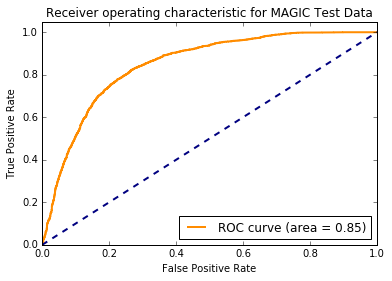

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
y_score = logreg.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test[:], y_score[:])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for MAGIC Test Data')
plt.legend(loc="lower right")
plt.show()

# Question 4: Support Vector Machines (14 pts)
(a) (6 pts) Apply a linear SVM (kernel = 'linear'), using the scikit-SVM (http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) on the standardized MAGIC Gamma Telescope Data Set. The data have been split into training and test datasets. You can find them in the Q3&Q4 folder. Standardize the columns so they all have mean 0 and unit variance. Specify how you chose the cost penalty ('C' parameter) for the model. Maintain all other parameters as default. 

Hint: see http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html will make 10-fold cross-validation easier. (GridSearchCV is one way to select parameters for a model. You may use it in your answer, or you may use other ways to solve the problem.)

(b) (4 pts) Repeat (a) but using a Gaussian radial basis kernel (RBF kernel).

(c) (4 pts) Summarize the comparative performance (mean error rates) of all the classifiers (Ridge Logistic Regression, SVM with linear kernel, SVM with RBF kernel) that you applied to the MAGIC Gamma Telescope Data Set in this homework in a table. What do you conclude? (be brief)

In [ ]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

lin_svm = GridSearchCV(SVC(C=1), tuned_parameters, cv=10)
lin_svm.fit(X_train, y_train)
BestScore = lin_svm.score(X_test, y_test)
print BestScore

In [ ]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'C': [1, 10, 100, 1000]}]

rbf_svm = GridSearchCV(SVC(C=1), tuned_parameters, cv=10)
rbf_svm.fit(X_train, y_train)
BestScore = rbf_svm.score(X_test, y_test)


(c) (4 pts) Summarize the comparative performance (mean error rates) of all the classifiers (Ridge Logistic Regression, SVM with linear kernel, SVM with RBF kernel) that you applied to the MAGIC Gamma Telescope Data Set in this homework in a table. What do you conclude? (be brief)

| Model | Score   |
|---|---|
|   Ridge Logistic Regression  | n/a|
|   SVM with linear kernel  | n/a|
|   SVM with RBF kernel  | n/a|


# Question 5:
(4 pts) What are two properties of Naïve Bayes that make it so suitable for parallel/distributed computation and for analyzing "streaming" data (e.g. each document is processed only once and need not be further stored or revisited).

(a) Probabilities for Naïve Bayes can be easily altered due to its counting property. Tallying counts is easily distributed across systems since data streams can be counted as they are incoming.

(b) 

# Question 6:
(5 pts) Receiver operating characteristic (ROC) are created by changing a  decision threshold (to decide when to classify an input as belonging to the positive class) in a binary classifier. While some classifiers yield a natural choice for threshold  by comparing with the (estimated value of the) posterior probability of the positive class given the input, other classifiers do not. Select one classifier among decision trees, K nearest neighbors, or support vector machines, and describe how the ROC curve can be drawn for the selected classifier. 